# ***Explicación del caso***

El objeto de esta activad es realizar una predicción del número de entradas y salidas en los aparcamientos gestionados por SAGULPA en un día del año. Para lo cual utilizaremos los datos abiertos publicados en su web.

Url: https://www.sagulpa.com/datos-abiertos

Trabajaremos con el dataset de aparcamientos, utilizando como fuente el fichero del mes de diciembre de 2019. Realizar la ingesta y transformación de datos de forma que podamos obtener las siguientes características en el dataset:


*   Parking
*   Day
*   Month
*   Year
*   Timeslot (0...23)
*   DayWeek (L/M/X/J/V/S/D)
*   Schoolday (S/N)
*   Holiday(S/N)
*   Temperature
*   Humidity
*   NumCheckin
*   NumCheckout

Como referencia para obtener la temperatura y humedad se podría utilizar la siguiente página:

Url: https://www.tutiempo.net/registros/gclp/1-diciembre-2019.html

Y con técnicas de "Scrapper" obtener la información que necesitamos:

Herramienta: Web Scraper - Free Web Scraping (Extensión de Chrome)

Url: https://chrome.google.com/webstore/detail/web-scraper-free-webscra/jnhgnonknehpejjnehehllkliplmbmhn?hl=es-419





# ***Carga de datos***

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url = "/content/drive/MyDrive/Curso IA_BigData/Colab Notebooks/Salvador - Sistemas de IA/Actividades/Ej 3.9 - Sagulpa/APARCAMIENTOS-DICIEMBRE-2019.xlsx"
df_2019 = pd.read_excel(url)

In [ ]:
df_2019.head(30000)

GarageNo APARCAMIENTO           EventTime EventDesc
0          8855        ELDER 2019-12-01 00:37:16    Salida
1          8855        ELDER 2019-12-01 01:17:08    Salida
2          8855        ELDER 2019-12-01 03:06:42    Salida
3          8855        ELDER 2019-12-01 08:09:06   Entrada
4          8855        ELDER 2019-12-01 10:43:24    Salida
...         ...          ...                 ...       ...
29995   1503325         MATA 2019-12-30 11:58:37   Entrada
29996   1503325         MATA 2019-12-01 19:22:21   Entrada
29997   1503325         MATA 2019-12-02 18:12:37   Entrada
29998   1503325         MATA 2019-12-03 18:58:32   Entrada
29999   1503325         MATA 2019-12-03 21:55:28   Entrada

[30000 rows x 4 columns]

In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276164 entries, 0 to 276163
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   GarageNo      276164 non-null  int64         
 1   APARCAMIENTO  276164 non-null  object        
 2   EventTime     276164 non-null  datetime64[ns]
 3   EventDesc     276164 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.4+ MB


***De este Dataframe, eliminaremos los datos de 'SAN BERNARDO' al considerarlos irrelevantes (Le añadiremos los datos de San Bernardo de 2021 que están más completos más adelante).***

In [ ]:
df_2019 = df_2019[df_2019['APARCAMIENTO'] != 'SAN BERNARDO']

In [ ]:
df_2019['APARCAMIENTO'].unique()

array(['ELDER', 'MATA', 'METROPOL', 'RINCON', 'SANAPU', 'VEGUETA'],
      dtype=object)

***¿Existen datos nulos?***

In [ ]:
null_check = df_2019.isnull().values.any()
nan_check = df_2019.isna().values.any()
inf_check = df_2019.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null?:', null_check )
print('¿Hay datos Nan?:', nan_check )
print('¿Hay datos Infinitos?:', inf_check )

¿Hay datos Null?: False
¿Hay datos Nan?: False
¿Hay datos Infinitos?: False


# ***Transformaciones de los datos***

## ***Obtener la fecha separada por Día, Mes, Año y Hora***

In [ ]:
# Crear columnas para el día, mes y año
df_2019['Day'] = df_2019['EventTime'].dt.day
df_2019['Month'] = df_2019['EventTime'].dt.month
df_2019['Year'] = df_2019['EventTime'].dt.year
df_2019['Timeslot'] = df_2019['EventTime'].dt.hour

## ***Obtener los días de la semana.***

In [ ]:
# Crear un diccionario para mapear los valores de día de la semana a los nombres de los días
dias = {0: 'L', 1: 'M', 2: 'X', 3: 
        'J', 4: 'V', 5: 'S', 6: 'D'}

# Crear una nueva columna 'DiaSemana' que contenga el nombre del día de la semana
df_2019['DayWeek'] = df_2019['EventTime'].dt.dayofweek.map(dias)

## ***Obtener los días festivos (Holiday) y los días laborables (Schoolday)***

Los días festivos serán indicados con un 1, y los laborables serán indicados con un 0

In [ ]:
# Esta importación nos permite obtener los días festivos de ciertos países y regiones
# Url de herramienta - holidays: https://github.com/dr-prodigy/python-holidays
import holidays
                      # Diccionario que contiene los días festivos de canarias
for fecha, fiesta in sorted(holidays.Spain(subdiv='CN', years=2019).items()):
  print(f'Fecha: {fecha} -  Festividad: {fiesta}')

Fecha: 2019-01-01 -  Festividad: Año nuevo
Fecha: 2019-01-07 -  Festividad: Epifanía del Señor (Trasladado)
Fecha: 2019-04-18 -  Festividad: Jueves Santo
Fecha: 2019-04-19 -  Festividad: Viernes Santo
Fecha: 2019-05-01 -  Festividad: Día del Trabajador
Fecha: 2019-05-30 -  Festividad: Día de Canarias
Fecha: 2019-08-15 -  Festividad: Asunción de la Virgen
Fecha: 2019-10-12 -  Festividad: Día de la Hispanidad
Fecha: 2019-11-01 -  Festividad: Todos los Santos
Fecha: 2019-12-06 -  Festividad: Día de la Constitución Española
Fecha: 2019-12-09 -  Festividad: La Inmaculada Concepción (Trasladado)
Fecha: 2019-12-25 -  Festividad: Navidad


In [ ]:
# Recorremos el diccionaro que contiene los días festivos de canarias del año 2019
for dia,nombre in sorted(holidays.Spain(subdiv='CN', years=2019).items()):

  # Si uno de los días festivos se encuentra en nuestro DataFrame
  if dia in df_2019['EventTime'].dt.date:
    df_2019['Holiday'] = 'S'
    df_2019['Schoolday'] = 'N'

  # Si no se encuentra dentro del DataFrame
  else:
    df_2019['Holiday'] = 'N'
    df_2019['Schoolday'] = 'S'

# Si el día es un domingo, también será festivo
df_2019.loc[df_2019['DayWeek'] == 'D', 'Holiday'] = 'S'
df_2019.loc[df_2019['DayWeek'] == 'D', 'Schoolday'] = 'N'

In [ ]:
df_2019.head(50000)

GarageNo APARCAMIENTO           EventTime EventDesc  Day  Month  Year  \
0          8855        ELDER 2019-12-01 00:37:16    Salida    1     12  2019   
1          8855        ELDER 2019-12-01 01:17:08    Salida    1     12  2019   
2          8855        ELDER 2019-12-01 03:06:42    Salida    1     12  2019   
3          8855        ELDER 2019-12-01 08:09:06   Entrada    1     12  2019   
4          8855        ELDER 2019-12-01 10:43:24    Salida    1     12  2019   
...         ...          ...                 ...       ...  ...    ...   ...   
49995   1504406     METROPOL 2019-12-18 08:37:17    Salida   18     12  2019   
49996   1504406     METROPOL 2019-12-18 14:04:18    Salida   18     12  2019   
49997   1504406     METROPOL 2019-12-18 19:45:30    Salida   18     12  2019   
49998   1504406     METROPOL 2019-12-19 14:17:34    Salida   19     12  2019   
49999   1504406     METROPOL 2019-12-19 19:28:15    Salida   19     12  2019   

       Timeslot DayWeek Holiday Schoolday  
0             0       D       S         N  
1             1       D       S         N  
2             3       D       S         N  
3             8       D       S         N  
4            10       D       S         N  
...         ...     ...     ...       ...  
49995         8       X       N         S  
49996        14       X       N         S  
49997        19       X       N         S  
49998        14       J       N         S  
49999        19       J       N         S  

[50000 rows x 11 columns]

## ***Obtener la Humedad y Temperaturas de cada día***

Json para hacer Scrapp a la web de: https://www.tutiempo.net/registros/gclp/1-diciembre-2019.html

{"_id":"tiempo","startUrl":["https://www.tutiempo.net/registros/gclp/1-diciembre-2019.html"],
 "selectors":[{"id":"Día","parentSelectors":["pagination"],"type":"SelectorText","selector":"th.ndia","multiple":false,"regex":""},
              {"id":"table","parentSelectors":["pagination"],"type":"SelectorTable","multiple":true,"selector":".last24 table","tableDataRowSelector":"tr:nth-of-type(n+3)","tableHeaderRowSelector":"tr:nth-of-type(2)",
               "columns":[{"extract":true,"header":"Hora","name":"Hora"},{"extract":true,"header":"Condiciones meteorológicasCM","name":"Condiciones meteorológicas"},
                          {"extract":true,"header":"Tem.","name":"Temperatura"},{"extract":true,"header":"Viento","name":"Viento"},{"extract":true,"header":"Hum.","name":"Humedad"},
                          {"extract":true,"header":"Presión","name":"Presión"}]},
              {"id":"pagination","parentSelectors":["_root","pagination"],"paginationType":"auto","selector":"a.prevnextreg:nth-of-type(2)","type":"SelectorPagination"}]}

***Carga de Datos obtenidos del Scrapping***

In [ ]:
url = "/content/drive/MyDrive/Curso IA_BigData/Colab Notebooks/Salvador - Sistemas de IA/Actividades/Ej 3.9 - Sagulpa/temphumidity_dec_2019.csv"
df_temp = pd.read_csv(url)
df_temp.head()

web-scraper-order                              web-scraper-start-url  \
0      1680016199-1  https://www.tutiempo.net/registros/gclp/1-dici...   
1      1680016199-2  https://www.tutiempo.net/registros/gclp/1-dici...   
2      1680016199-3  https://www.tutiempo.net/registros/gclp/1-dici...   
3      1680016199-4  https://www.tutiempo.net/registros/gclp/1-dici...   
4      1680016199-5  https://www.tutiempo.net/registros/gclp/1-dici...   

                        Día   Hora Condiciones meteorológicas Temperatura  \
0  Domingo 1 Diciembre 2019  00:00            Nubes dispersas         20°   
1  Domingo 1 Diciembre 2019    NaN                        NaN         NaN   
2  Domingo 1 Diciembre 2019  00:30      Parcialmente cubierto         20°   
3  Domingo 1 Diciembre 2019  01:00      Parcialmente cubierto         20°   
4  Domingo 1 Diciembre 2019  01:30      Parcialmente cubierto         20°   

    Viento Humedad   Presión pagination  
0  26 km/h     83%  1021 hPa        NaN  
1      NaN     NaN       NaN        NaN  
2  30 km/h     83%  1021 hPa        NaN  
3  30 km/h     83%  1021 hPa        NaN  
4  30 km/h     83%  1021 hPa        NaN

In [ ]:
df_temp = df_temp[['Día','Hora','Temperatura','Humedad']]
df_temp

Día   Hora Temperatura Humedad
0     Domingo 1 Diciembre 2019  00:00         20°     83%
1     Domingo 1 Diciembre 2019    NaN         NaN     NaN
2     Domingo 1 Diciembre 2019  00:30         20°     83%
3     Domingo 1 Diciembre 2019  01:00         20°     83%
4     Domingo 1 Diciembre 2019  01:30         20°     83%
...                        ...    ...         ...     ...
1524  Martes 31 Diciembre 2019  21:30         17°     27%
1525  Martes 31 Diciembre 2019  22:00         18°     24%
1526  Martes 31 Diciembre 2019  22:30         18°     26%
1527  Martes 31 Diciembre 2019  23:00         17°     27%
1528  Martes 31 Diciembre 2019  23:30         17°     27%

[1529 rows x 4 columns]

***¿Existen datos nulos?***

In [ ]:
null_check = df_temp.isnull().values.any()
nan_check = df_temp.isna().values.any()
inf_check = df_temp.isin([np.inf, -np.inf]).values.any()

print('¿Hay datos Null?:', null_check )
print('¿Hay datos Nan?:', nan_check )
print('¿Hay datos Infinitos?:', inf_check )

¿Hay datos Null?: True
¿Hay datos Nan?: True
¿Hay datos Infinitos?: False


In [ ]:
for columna in df_temp.columns:
  print(f'Columna: {columna}')
  print(f'Null Values: {df_temp[columna].isnull().values.any()}')
  print(f'NaN Values: {df_temp[columna].isna().values.any()}\n')

Columna: Día
Null Values: False
NaN Values: False

Columna: Hora
Null Values: True
NaN Values: True

Columna: Temperatura
Null Values: True
NaN Values: True

Columna: Humedad
Null Values: True
NaN Values: True



**De la columna 'Día' separamos el número que corresponde al día del mes y lo llamaremos igual que en nuestro otro dataframe. Haremos lo mismo con la columna Hora, transformándola en Timeslot.**

In [ ]:
# Obtenemos el núumero de la columna del Día
df_temp["Day"] = df_temp["Día"].str.extract("(\d+)").astype(int)

# Transformamos la columna que contiene las horas para poder
# compararla con el otro dataset
df_temp = df_temp.rename(columns={"Hora": "Timeslot"})
df_temp['Timeslot'] = pd.to_datetime(df_temp['Timeslot'])
df_temp['Timeslot'] = df_temp['Timeslot'].dt.hour

# Rellenar los datos
df_temp[['Timeslot','Temperatura','Humedad']].fillna(df_temp.rolling(20, min_periods=1).mean(), inplace=True)

# Por si queremos eliminar las filas...
df_temp = df_temp.dropna()


df_temp['Timeslot'] = df_temp['Timeslot'].astype(int)

df_temp.head(100)

<ipython-input-17-eaf6e6cd99cf>:11: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Día', 'Humedad', 'Temperatura'], dtype='object')
  df_temp[['Timeslot','Temperatura','Humedad']].fillna(df_temp.rolling(20, min_periods=1).mean(), inplace=True)
<ipython-input-17-eaf6e6cd99cf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[['Timeslot','Temperatura','Humedad']].fillna(df_temp.rolling(20, min_periods=1).mean(), inplace=True)


Día  Timeslot Temperatura Humedad  Day
0    Domingo 1 Diciembre 2019         0         20°     83%    1
2    Domingo 1 Diciembre 2019         0         20°     83%    1
3    Domingo 1 Diciembre 2019         1         20°     83%    1
4    Domingo 1 Diciembre 2019         1         20°     83%    1
5    Domingo 1 Diciembre 2019         2         20°     78%    1
..                        ...       ...         ...     ...  ...
97     Lunes 2 Diciembre 2019        22         17°     88%    2
98     Lunes 2 Diciembre 2019        23         18°     83%    2
99     Lunes 2 Diciembre 2019        23         18°     77%    2
100   Martes 3 Diciembre 2019         0         17°     82%    3
102   Martes 3 Diciembre 2019         0         18°     77%    3

[100 rows x 5 columns]

***Agrupamos ambos datasets a raíz del día del mes y la hora.***

In [ ]:
df = pd.merge(df_2019, df_temp, left_on=['Timeslot','Day'], right_on=['Timeslot','Day'], how='left')

In [ ]:
df.head()

GarageNo APARCAMIENTO           EventTime EventDesc  Day  Month  Year  \
0      8855        ELDER 2019-12-01 00:37:16    Salida    1     12  2019   
1      8855        ELDER 2019-12-01 00:37:16    Salida    1     12  2019   
2      8855        ELDER 2019-12-01 01:17:08    Salida    1     12  2019   
3      8855        ELDER 2019-12-01 01:17:08    Salida    1     12  2019   
4      8855        ELDER 2019-12-01 03:06:42    Salida    1     12  2019   

   Timeslot DayWeek Holiday Schoolday                       Día Temperatura  \
0         0       D       S         N  Domingo 1 Diciembre 2019         20°   
1         0       D       S         N  Domingo 1 Diciembre 2019         20°   
2         1       D       S         N  Domingo 1 Diciembre 2019         20°   
3         1       D       S         N  Domingo 1 Diciembre 2019         20°   
4         3       D       S         N  Domingo 1 Diciembre 2019         20°   

  Humedad  
0     83%  
1     83%  
2     83%  
3     83%  
4     78%

## ***Eliminamos las columnas que no nos sirven para el propósito del ejercicio.***

In [ ]:
# Renombramos las columnas al inglés
df = df.rename(columns={"APARCAMIENTO": "Parking"})
df = df.rename(columns={"Temperatura": "Temperature"})
df = df.rename(columns={"Humedad": "Humidity"})

# Recortamos el dataframe a las columnas que nos interesan 
df = df[['Parking','Day','Month','Year','Timeslot','DayWeek',
         'Schoolday','Holiday','Temperature','Humidity','EventDesc']]

df.head()

Parking  Day  Month  Year  Timeslot DayWeek Schoolday Holiday Temperature  \
0   ELDER    1     12  2019         0       D         N       S         20°   
1   ELDER    1     12  2019         0       D         N       S         20°   
2   ELDER    1     12  2019         1       D         N       S         20°   
3   ELDER    1     12  2019         1       D         N       S         20°   
4   ELDER    1     12  2019         3       D         N       S         20°   

  Humidity EventDesc  
0      83%    Salida  
1      83%    Salida  
2      83%    Salida  
3      83%    Salida  
4      78%    Salida

## **Obtener el Conjunto de Salidas y Entradas de cada día.**

***Vamos a generar las columas CheckIn, que contendrá 1 por cada valor 'Entrada' de la columna de EventDesc, y CheckOut, que contendrá 1 por cada valor de 'Salida'.***

In [ ]:
# Aplicamos una condición al valor de las Salidas y Entradas
# Valor de [CheckIn] / [CheckOut] = 1 si
# el valor de la columna [EventDesc] es 'Entrada' o 'Salida' respectivamente
df['CheckIn'] = df['EventDesc'].apply(lambda x: 1 if x == 'Entrada' else 0)
df['CheckOut'] = df['EventDesc'].apply(lambda x: 1 if x == 'Salida' else 0)

In [ ]:
df.head()

Parking  Day  Month  Year  Timeslot DayWeek Schoolday Holiday Temperature  \
0   ELDER    1     12  2019         0       D         N       S         20°   
1   ELDER    1     12  2019         0       D         N       S         20°   
2   ELDER    1     12  2019         1       D         N       S         20°   
3   ELDER    1     12  2019         1       D         N       S         20°   
4   ELDER    1     12  2019         3       D         N       S         20°   

  Humidity EventDesc  CheckIn  CheckOut  
0      83%    Salida        0         1  
1      83%    Salida        0         1  
2      83%    Salida        0         1  
3      83%    Salida        0         1  
4      78%    Salida        0         1

## ***Agrupar el dataframe por el conjunto de salidas y entradas del mes***

***Sumaremos para cada Parking, en cada Día del Mes y a cada Hora el número de Entradas y Salidas.***

In [ ]:
df = df.groupby(['Parking', 'Day', 'Month', 'Year', 'DayWeek', 'Timeslot', 'Holiday','Schoolday','Temperature','Humidity'], 
                as_index=False)[['CheckIn', 'CheckOut']].sum()

In [ ]:
df.head(10000)

Parking  Day  Month  Year DayWeek  Timeslot Holiday Schoolday  \
0       ELDER    1     12  2019       D         0       S         N   
1       ELDER    1     12  2019       D         1       S         N   
2       ELDER    1     12  2019       D         2       S         N   
3       ELDER    1     12  2019       D         3       S         N   
4       ELDER    1     12  2019       D         3       S         N   
...       ...  ...    ...   ...     ...       ...     ...       ...   
6551  VEGUETA   31     12  2019       M        21       N         S   
6552  VEGUETA   31     12  2019       M        21       N         S   
6553  VEGUETA   31     12  2019       M        22       N         S   
6554  VEGUETA   31     12  2019       M        22       N         S   
6555  VEGUETA   31     12  2019       M        23       N         S   

     Temperature Humidity  CheckIn  CheckOut  
0            20°      83%       32        46  
1            20°      83%       16        50  
2            20°      78%        2        44  
3            19°      83%        1        23  
4            20°      78%        1        23  
...          ...      ...      ...       ...  
6551         17°      27%       10         8  
6552         17°      45%       10         8  
6553         18°      24%        1         3  
6554         18°      26%        1         3  
6555         17°      27%        4         6  

[6556 rows x 12 columns]

In [ ]:
df.groupby(['Parking'],as_index=False)[['CheckIn', 'CheckOut']].sum()

Parking  CheckIn  CheckOut
0     ELDER    28793     28474
1      MATA    17813     17695
2  METROPOL    27667     27869
3    RINCON   102431    102512
4    SANAPU    28053     28098
5   VEGUETA    65184     65285

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556 entries, 0 to 6555
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Parking      6556 non-null   object
 1   Day          6556 non-null   int64 
 2   Month        6556 non-null   int64 
 3   Year         6556 non-null   int64 
 4   DayWeek      6556 non-null   object
 5   Timeslot     6556 non-null   int64 
 6   Holiday      6556 non-null   object
 7   Schoolday    6556 non-null   object
 8   Temperature  6556 non-null   object
 9   Humidity     6556 non-null   object
 10  CheckIn      6556 non-null   int64 
 11  CheckOut     6556 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 614.8+ KB


## ***Transformaciones del DataFrame para su entrenamiento.***

In [ ]:
# Cambiamos las variables del tipo Object a Numérica
df['Parking'].replace(['ELDER','MATA','METROPOL','RINCON','SANAPU','VEGUETA'],[0,1,2,3,4,5],inplace=True)
df['DayWeek'].replace(['L','M','X','J','V','S','D'],[0,1,2,3,4,5,6],inplace=True)
df['Holiday'].replace(['N','S'],[0,1],inplace=True)
df['Schoolday'].replace(['N','S'],[0,1],inplace=True)
df['Temperature'] = df['Temperature'].str.replace('°','').astype(int)
df['Humidity'] = df['Humidity'].str.replace('%','').astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556 entries, 0 to 6555
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Parking      6556 non-null   int64
 1   Day          6556 non-null   int64
 2   Month        6556 non-null   int64
 3   Year         6556 non-null   int64
 4   DayWeek      6556 non-null   int64
 5   Timeslot     6556 non-null   int64
 6   Holiday      6556 non-null   int64
 7   Schoolday    6556 non-null   int64
 8   Temperature  6556 non-null   int64
 9   Humidity     6556 non-null   int64
 10  CheckIn      6556 non-null   int64
 11  CheckOut     6556 non-null   int64
dtypes: int64(12)
memory usage: 614.8 KB


## ***Escalamiento de las características.***


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# # Creamos un objeto para el escalamiento de datos
# # scaler = MinMaxScaler()
# scaler = StandardScaler()

# columnas = ['Parking','Day','DayWeek','Timeslot','Temperature','Humidity']

# # Escalamos los valores de la columna
# for columna in columnas:
#   df[columna] = scaler.fit_transform(df[[columna]])


In [ ]:
df

Parking  Day  Month  Year  DayWeek  Timeslot  Holiday  Schoolday  \
0           0    1     12  2019        6         0        1          0   
1           0    1     12  2019        6         1        1          0   
2           0    1     12  2019        6         2        1          0   
3           0    1     12  2019        6         3        1          0   
4           0    1     12  2019        6         3        1          0   
...       ...  ...    ...   ...      ...       ...      ...        ...   
6551        5   31     12  2019        1        21        0          1   
6552        5   31     12  2019        1        21        0          1   
6553        5   31     12  2019        1        22        0          1   
6554        5   31     12  2019        1        22        0          1   
6555        5   31     12  2019        1        23        0          1   

      Temperature  Humidity  CheckIn  CheckOut  
0              20        83       32        46  
1              20        83       16        50  
2              20        78        2        44  
3              19        83        1        23  
4              20        78        1        23  
...           ...       ...      ...       ...  
6551           17        27       10         8  
6552           17        45       10         8  
6553           18        24        1         3  
6554           18        26        1         3  
6555           17        27        4         6  

[6556 rows x 12 columns]

## ***Matriz de correlación de los datos de 2019***

In [ ]:
# Manipulación y visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from scipy.stats import randint as sp_randint

<Axes: >

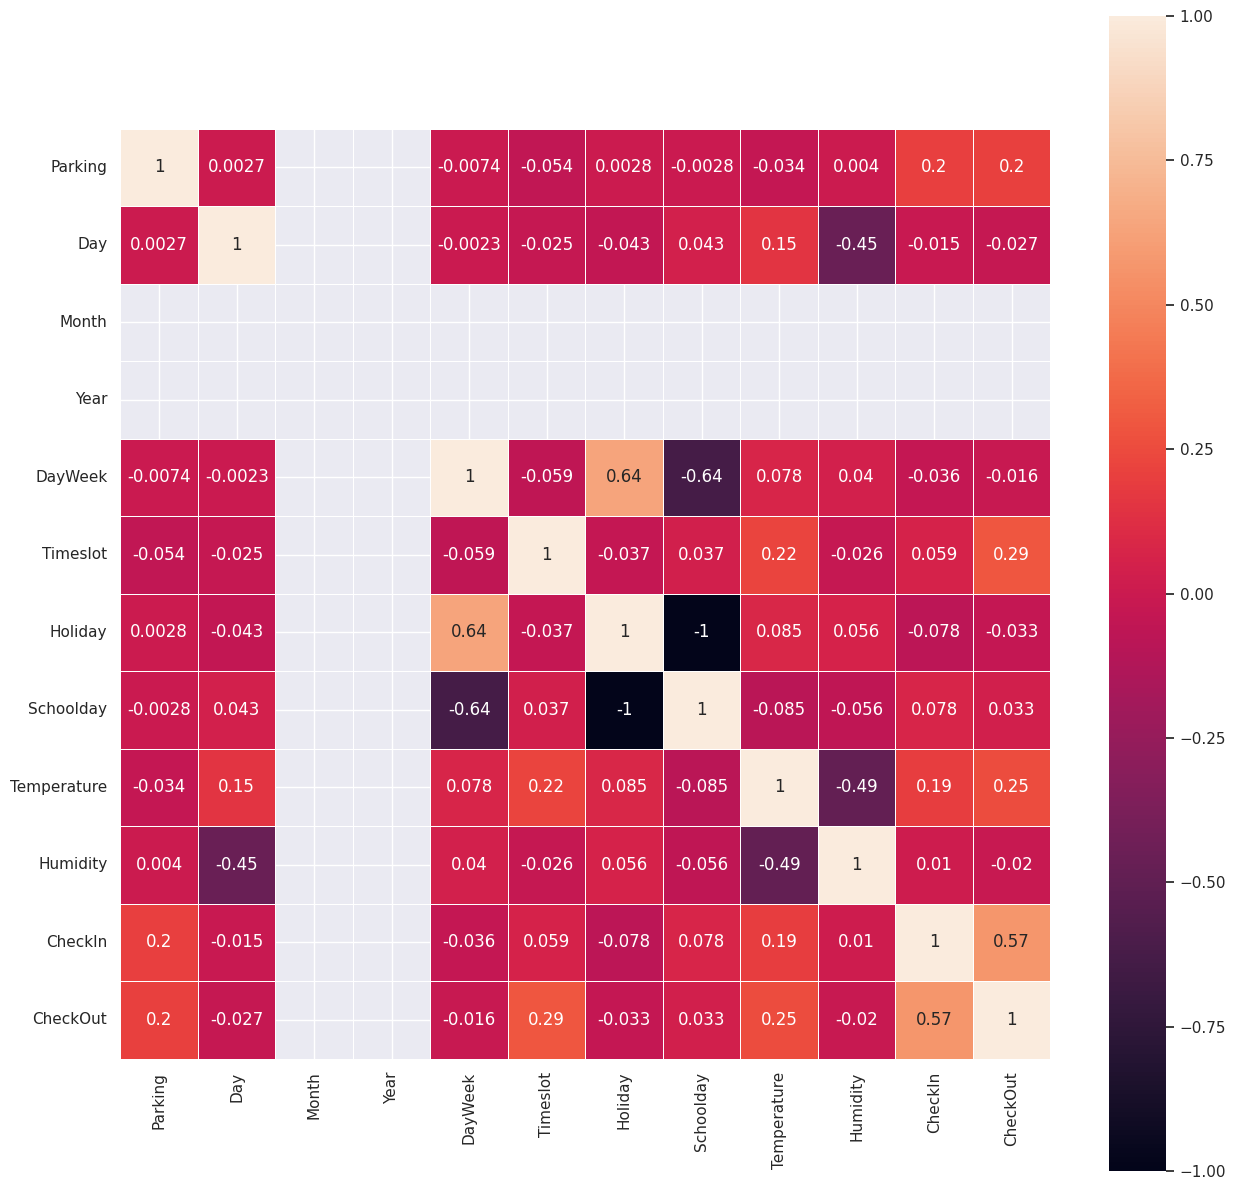

In [ ]:
# Se utiliza la librería Seaborn descargada más arriba
sns.set()
fig, ax = plt.subplots(figsize=(15,15))  # Manipular el tamaño del Mapa
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5, ax=ax)

***Es importante entender el contexto de los valores de correlación para Año y Mes:***

*Estamos trabajando con un Dataset que solo recoje datos en Diciembre de 2019, así que ninguno de los dos valores cambia, por eso no tienen correlación con ningún otro valor.*

## ***Comparativa por pares de datos para los valores de Entrada.***

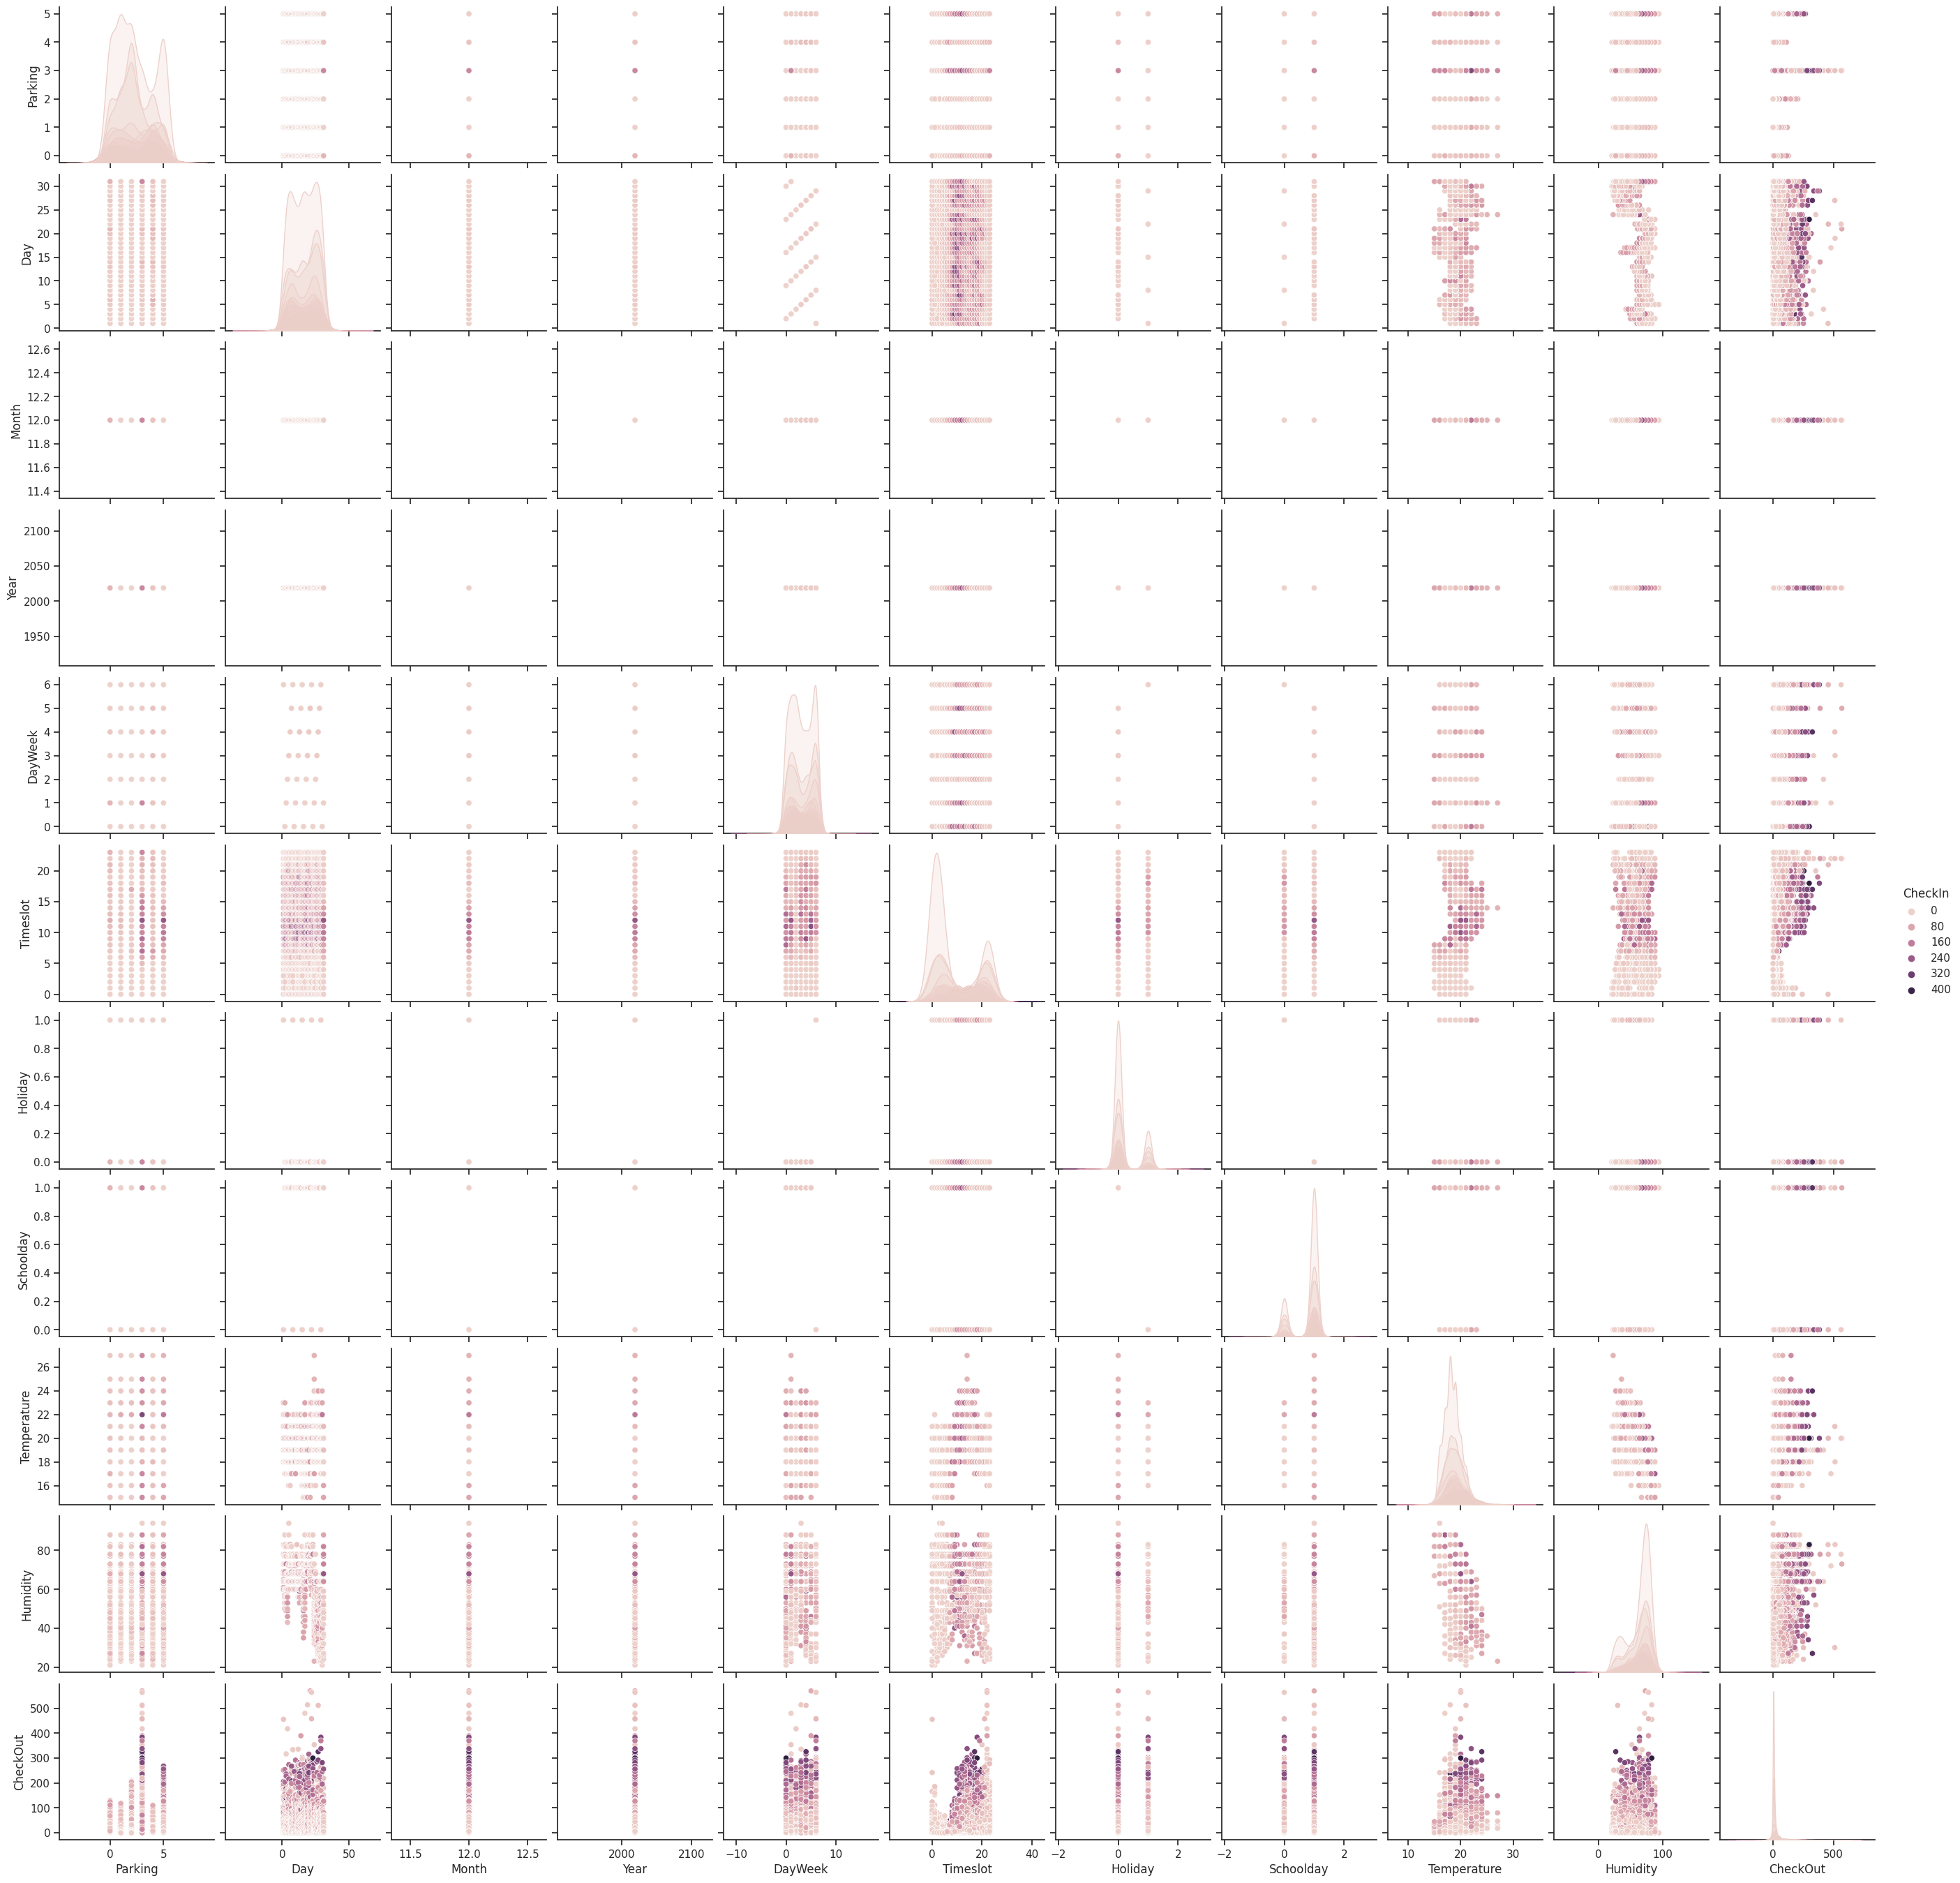

In [ ]:
# Usamos las librerías seaborn y matpplotlib que ya descargamos anteriormente 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='CheckIn')
plt.show()

***Comparativa por pares de datos para los valores de Salida.***

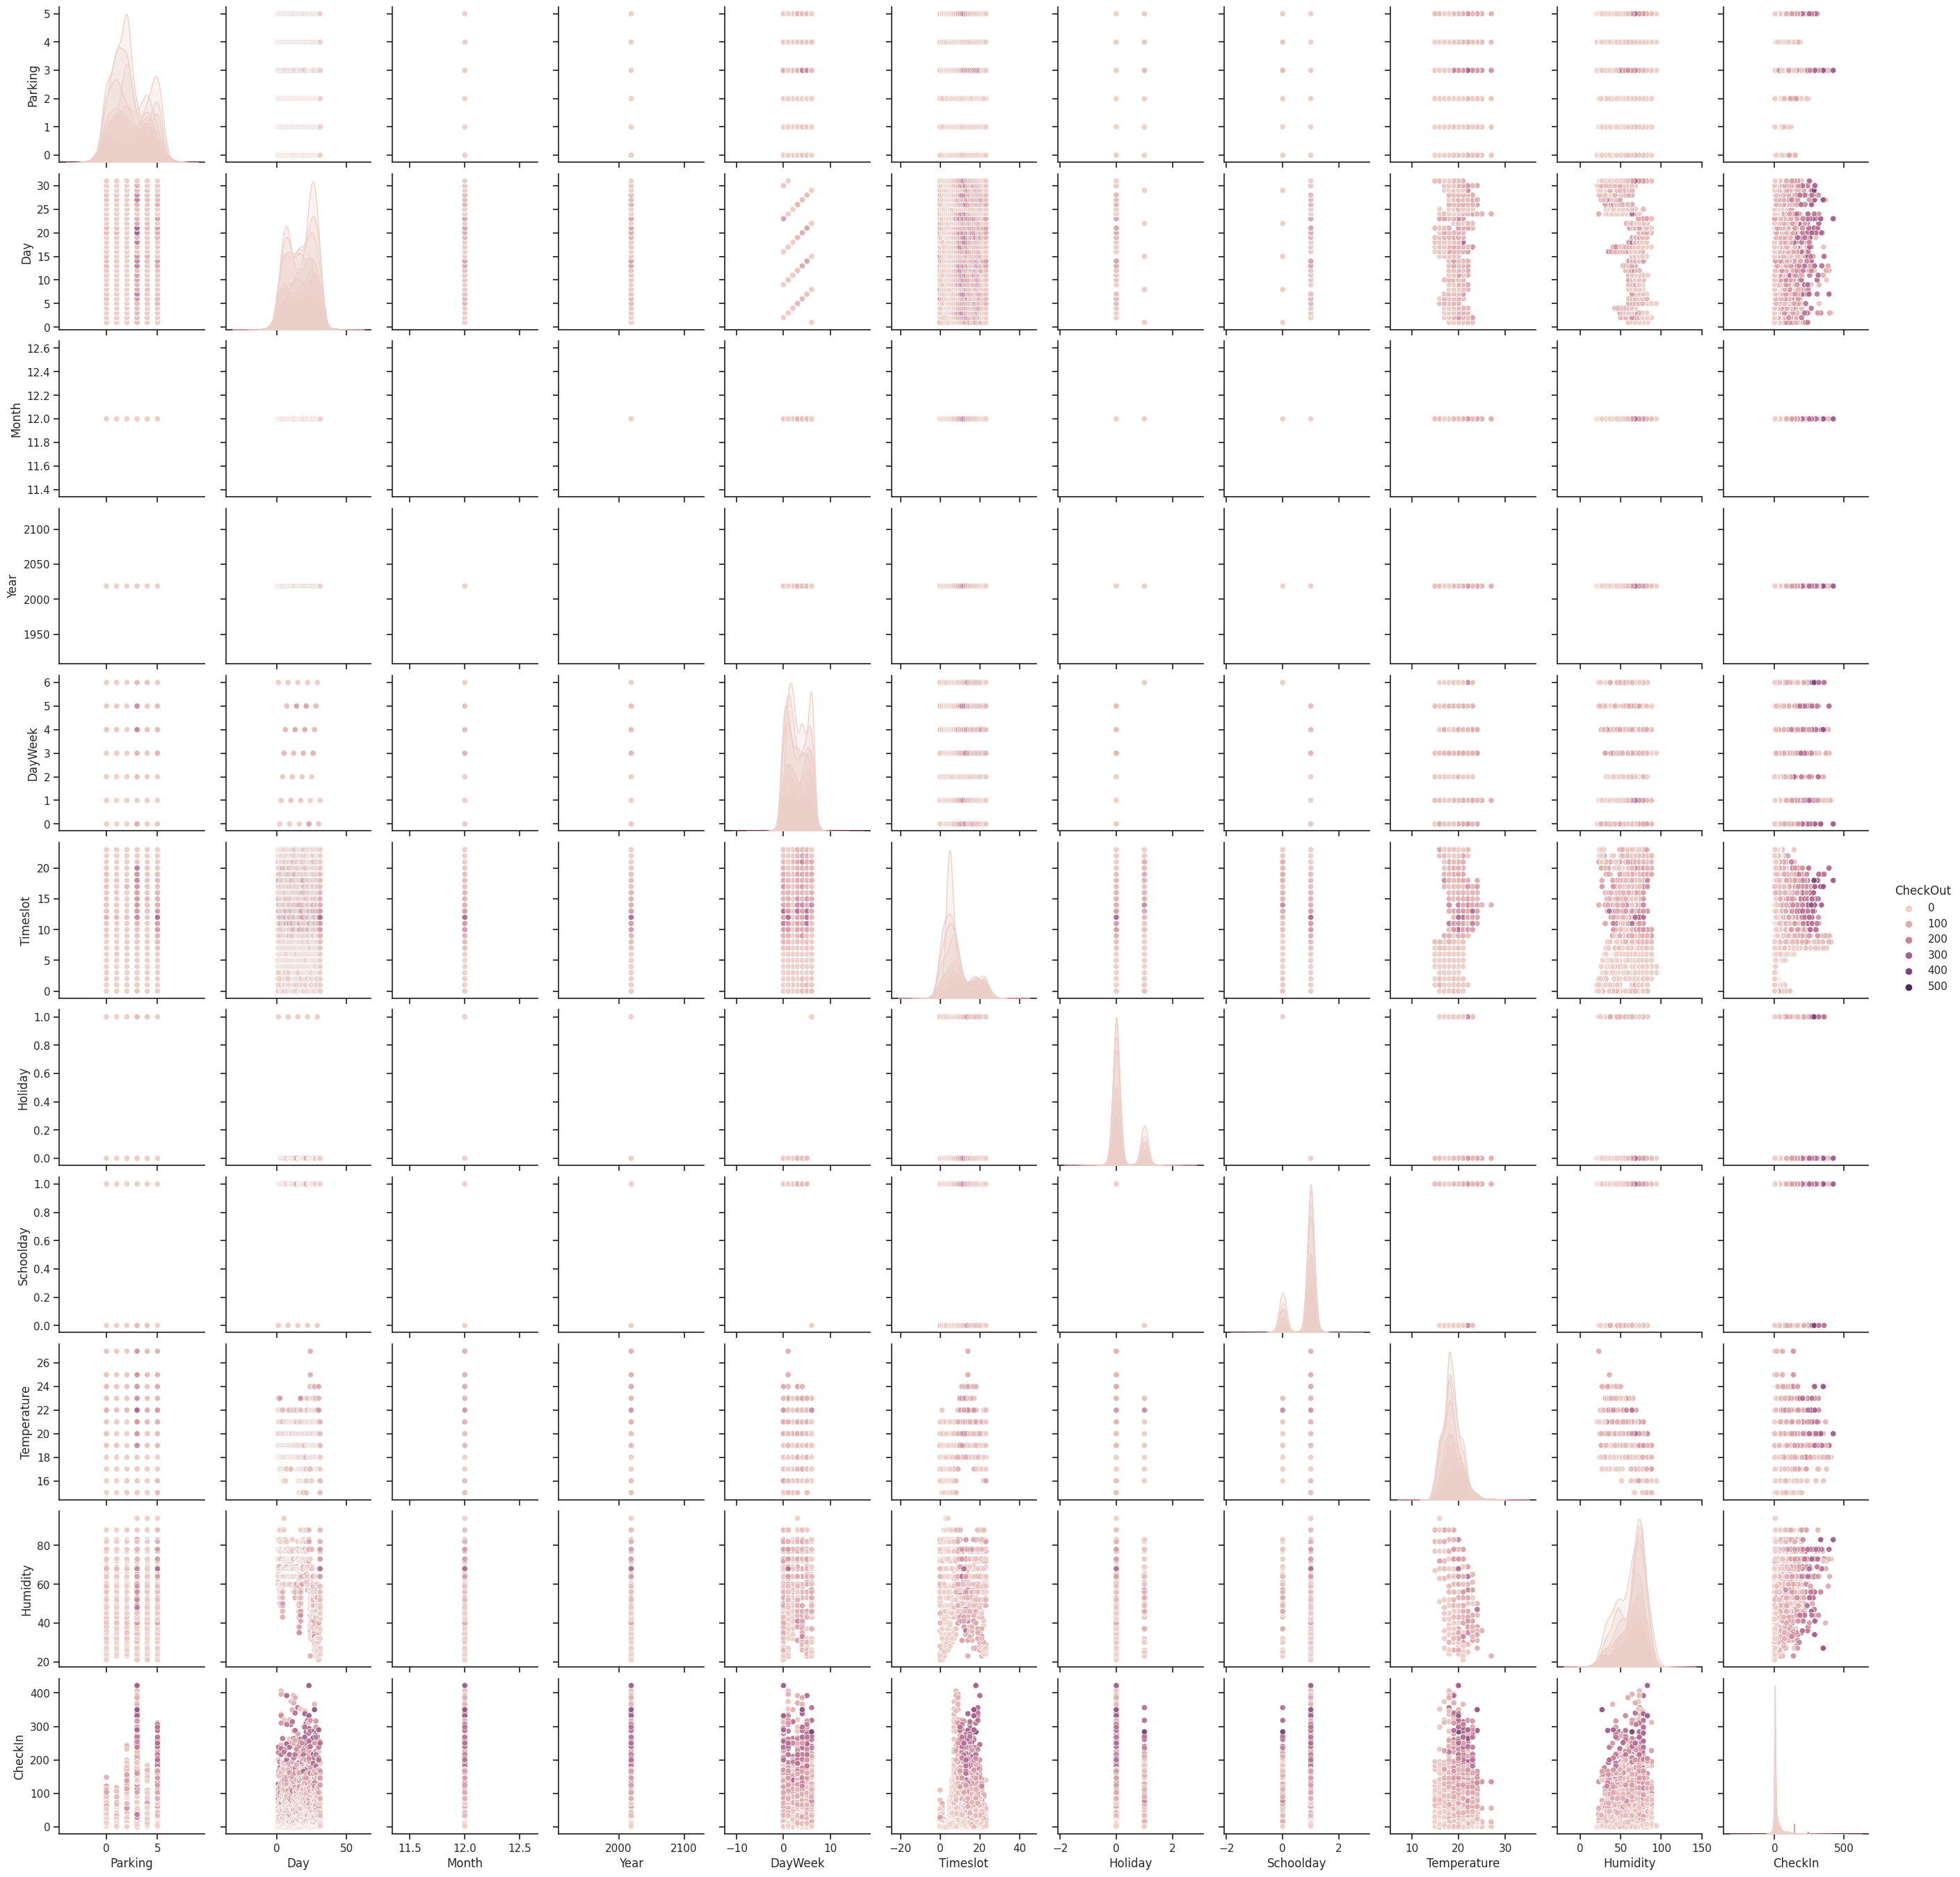

In [ ]:
# Usamos las librerías seaborn y matpplotlib que ya descargamos anteriormente 
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue='CheckOut')
plt.show()

# ***1 - Fase de Entrenamiento: Modelo Predictivo de las Entradas***

## ***Separación de los datos de entrenamiento y test para los valores de Entradas (CheckIn)***

In [ ]:
# Separamos datos de entrada y salida
Y_Train_In = df['CheckIn']
X_Train = df.drop(['CheckIn', 'CheckOut'], axis = 'columns')

# Separamos en Train y Test los datos en un porcentaje del 25% para los tipo Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Train, Y_Train_In, test_size=0.2)

## ***Modelo de Predicción: Gradient Boost Regressor***

### ***Parametrización del Modelo***

***Utilizaremos el modelo de árbol de regresión con potenciación del gradiente, parametrizándolo con RandomSearch y utilizando una validación cruzada con TimeSeriesSplit***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

regressor = GradientBoostingRegressor()

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
 "max_features": [None, 'sqrt','log2'],
 "loss" : ['absolute_error', 'huber', 'quantile'],
 "criterion": ['squared_error', 'friedman_mse']
 }

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 270


In [ ]:
# Validación cruzada en saltos de 5 para entrenar el modelo
tscv = TimeSeriesSplit(n_splits=5)
# random_test = sp_randint(2, 50)

rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, n_iter = 100, cv = tscv, random_state=0, n_jobs = -1)

In [ ]:
# Entrenamiento del modelo
rnd_regres.fit(x_train, y_train)

# Obtenemos el método de scoring
scoring_type = rnd_regres.scoring
print(f'El tipo de scoring utilizado es {scoring_type}')

# Obtenemos el mejor estimador de hiperparámetros para nuestro modelo
best_entries_random = rnd_regres.best_estimator_
print(f"Mejor Estimador: {best_entries_random}")

El tipo de scoring utilizado es None
Mejor Estimador: GradientBoostingRegressor(criterion='squared_error', learning_rate=0.5,
                          loss='huber', n_estimators=64)


In [ ]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
# Obtenemos el reporte de las mejores combinaciones de parametrización
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.659 (std: 0.020)
Parameters: {'n_estimators': 64, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.5, 'criterion': 'squared_error'}

Model with rank: 2
Mean validation score: 0.659 (std: 0.020)
Parameters: {'n_estimators': 64, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}

Model with rank: 3
Mean validation score: 0.653 (std: 0.023)
Parameters: {'n_estimators': 128, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.25, 'criterion': 'friedman_mse'}

Model with rank: 4
Mean validation score: 0.652 (std: 0.023)
Parameters: {'n_estimators': 128, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.25, 'criterion': 'squared_error'}

Model with rank: 5
Mean validation score: 0.625 (std: 0.024)
Parameters: {'n_estimators': 32, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}



In [ ]:
# Utilizamos el modelo con los mejores parámetros para entrenar
# y predecir con los datos de test
best_entries_random.fit(X_Train, Y_Train_In)
y_pred_in = best_entries_random.predict(x_test)
score = best_entries_random.score(x_test, y_test)

# Evaluación del modelo 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_in)
print(f'MAE:  {mae}')
print(f'R2 Score: {score.round(2)}')

MAE:  15.991534253169414
R2 Score: 0.71


In [ ]:
print(f"Predicciones: {y_pred_in.astype(int)}")

Predicciones: [123  32 126 ...  44  25  27]


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


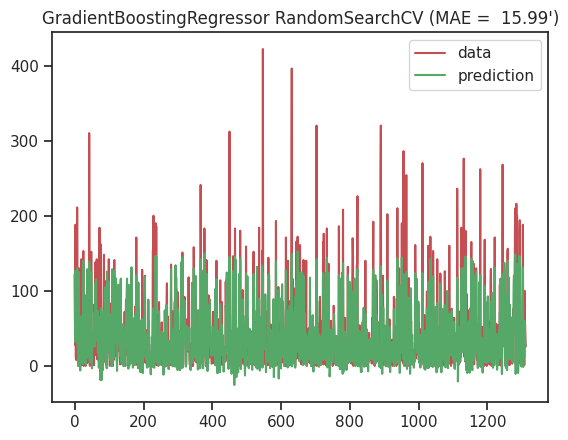

In [ ]:
from sklearn.metrics import mean_absolute_error    
import matplotlib.pyplot as plt        
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred_in, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("GradientBoostingRegressor RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

Text(0.5, 1.0, 'GridSearchCV(GradientBoostingRegressor()) ( MAE =  15.99)')

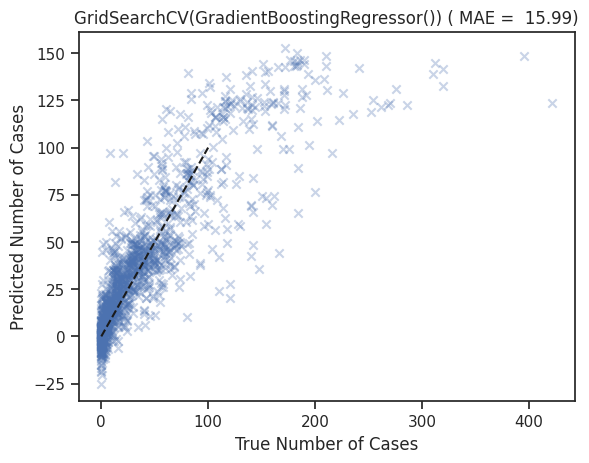

In [ ]:
plt.scatter(y_test.to_numpy(int), y_pred_in, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("GridSearchCV(GradientBoostingRegressor()) ( MAE = %6.2f)" % ( mae))

In [ ]:
features = list(x_train.columns)

# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': (features),
              'Random Forest': best_entries_random.feature_importances_})

Feature Relevancies


Attributes  Random Forest
0      Parking       0.388425
1          Day       0.040880
2        Month       0.000000
3         Year       0.000000
4      DayWeek       0.051685
5     Timeslot       0.498213
6      Holiday       0.003806
7    Schoolday       0.000996
8  Temperature       0.009245
9     Humidity       0.006749

# ***2 - Fase de Entrenamiento: Modelo Predictivo de las Salidas***

## ***Separación de los datos de entrenamiento y test para los valores de Salidas(CheckOut)***

In [ ]:
# Separamos datos de entrada y salida
Y_Train_Out = df['CheckOut']
X_Train = df.drop(['CheckIn', 'CheckOut'], axis = 'columns')

# Separamos en Train y Test los datos en un porcentaje del 25% para los tipo Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Train, Y_Train_Out, test_size=0.2)

## ***Modelo de Predicción: Gradient Boost Regressor***

### ***Parametrización del Modelo***

***Utilizaremos el modelo de árbol de regresión con potenciación del gradiente, parametrizándolo con RandomSearch y utilizando una validación cruzada con TimeSeriesSplit***

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV

regressor = GradientBoostingRegressor()

param_dist = {
 "n_estimators": [32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
 "max_features": [None, 'sqrt','log2'],
 "loss" : ['absolute_error', 'huber', 'quantile'],
 "criterion": ['squared_error', 'friedman_mse']
 }

In [ ]:
# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros en GridSearchCV es {num_combinations}')

El número total de combinaciones de parámetros en GridSearchCV es 270


In [ ]:
# Validación cruzada en saltos de 5 para entrenar el modelo
tscv = TimeSeriesSplit(n_splits=5)
# random_test = sp_randint(2, 50)

rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, n_iter = 100, cv = tscv, random_state=0, n_jobs = -1)

In [ ]:
# Entrenamiento del modelo
rnd_regres.fit(x_train, y_train)

# Obtenemos el método de scoring
scoring_type = rnd_regres.scoring
print(f'El tipo de scoring utilizado es {scoring_type}')

# Obtenemos el mejor estimador de hiperparámetros para nuestro modelo
best_departures_random = rnd_regres.best_estimator_
print(f"Mejor Estimador: {best_departures_random}")

El tipo de scoring utilizado es None
Mejor Estimador: GradientBoostingRegressor(learning_rate=0.25, loss='huber', n_estimators=128)


In [ ]:
def report(results, n_top=3): # Función para mostrar resultados
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
# Obtenemos el reporte de las mejores combinaciones de parametrización
report(rnd_regres.cv_results_, n_top = 5)

Model with rank: 1
Mean validation score: 0.654 (std: 0.042)
Parameters: {'n_estimators': 128, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.25, 'criterion': 'friedman_mse'}

Model with rank: 2
Mean validation score: 0.654 (std: 0.041)
Parameters: {'n_estimators': 128, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.25, 'criterion': 'squared_error'}

Model with rank: 3
Mean validation score: 0.646 (std: 0.035)
Parameters: {'n_estimators': 64, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.5, 'criterion': 'squared_error'}

Model with rank: 4
Mean validation score: 0.645 (std: 0.035)
Parameters: {'n_estimators': 64, 'max_features': None, 'loss': 'huber', 'learning_rate': 0.5, 'criterion': 'friedman_mse'}

Model with rank: 5
Mean validation score: 0.636 (std: 0.033)
Parameters: {'n_estimators': 128, 'max_features': 'log2', 'loss': 'huber', 'learning_rate': 0.5, 'criterion': 'squared_error'}



In [ ]:
# Utilizamos el modelo con los mejores parámetros para entrenar
# y predecir con los datos de test
best_departures_random.fit(X_Train, Y_Train_Out)
y_pred_out = best_departures_random.predict(x_test)
score = best_departures_random.score(x_test, y_test)

# Evaluación del modelo 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_out)
print(f'MAE:  {mae}')
print(f'R2 Score: {score.round(2)}')

MAE:  15.07123551306778
R2 Score: 0.69


In [ ]:
print(f"Predicciones: {y_pred_out.astype(int)}")

Predicciones: [ 99   6  23 ...  32  54 123]


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


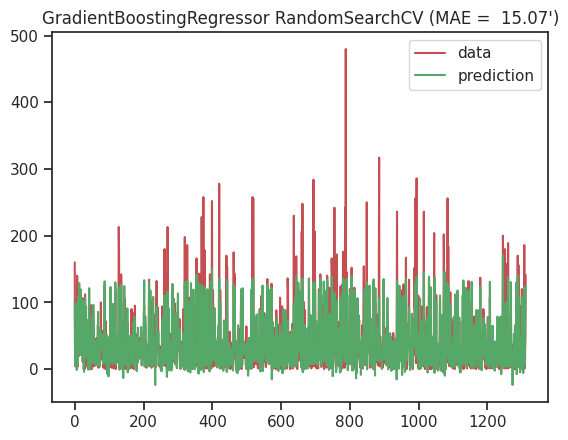

In [ ]:
from sklearn.metrics import mean_absolute_error    
import matplotlib.pyplot as plt        
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred_out, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("GradientBoostingRegressor RandomSearchCV (MAE = %6.2f')" % ( mae))

plt.show()

Text(0.5, 1.0, 'GridSearchCV(GradientBoostingRegressor()) ( MAE =  15.07)')

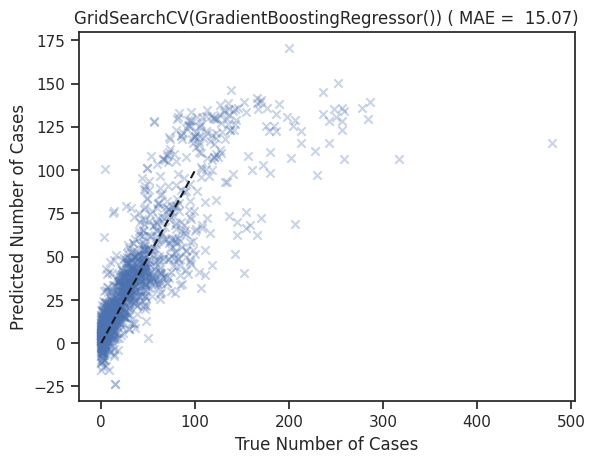

In [ ]:
plt.scatter(y_test.to_numpy(int), y_pred_out, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("GridSearchCV(GradientBoostingRegressor()) ( MAE = %6.2f)" % ( mae))

In [ ]:
features = list(x_train.columns)

# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': (features),
              'Random Forest': best_departures_random.feature_importances_})

Feature Relevancies


Attributes  Random Forest
0      Parking       0.433996
1          Day       0.042632
2        Month       0.000000
3         Year       0.000000
4      DayWeek       0.063240
5     Timeslot       0.415470
6      Holiday       0.001218
7    Schoolday       0.006148
8  Temperature       0.023535
9     Humidity       0.013759

# ***Exportar los modelos de Predicción***

In [ ]:
!pip install joblib
import joblib
from google.colab import files
# Para exportar el modelo a un fichero
modelo_salidas = joblib.dump(best_departures_random,'Sagulpa_Modelo_Salidas.pkl')
modelo_entradas = joblib.dump(best_entries_random,'Sagulpa_Modelo_Entradas.pkl')

files.download('Sagulpa_Modelo_Salidas.pkl')
files.download('Sagulpa_Modelo_Entradas.pkl')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Testeo: Predicciones para 2022***

***Para analizar en profundidad el valor de nuestro modelo de análisis de datos, vamos a utilizar otor conjunto de datos para ver los resultados obtenidos.***

***Utilizaremos los datos de Sagulpa para Diciembre de 2022.***

## **Importar los modelos de predicción**

In [ ]:
# Para importar el modelo entrenado...
modelo_salidas = GradientBoostingRegressor()
modelo_entradas = GradientBoostingRegressor()

modelo_entradas = joblib.load('Sagulpa_Modelo_Entradas.pkl')
modelo_salidas = joblib.load('Sagulpa_Modelo_Salidas.pkl')

## ***Transformaciones de los datos***

In [ ]:
# Carga de los Datos de Sagulpa
url = "/content/drive/MyDrive/Curso IA_BigData/Colab Notebooks/Salvador - Sistemas de IA/Actividades/Ej 3.9 - Sagulpa/APARCAMIENTOS-DICIEMBRE-2022.xlsx"
df_2022 = pd.read_excel(url)
df_2022.head()

APARCAMIENTO           EventTime EventDesc
0      VEGUETA 2022-12-01 00:11:30    SALIDA
1      VEGUETA 2022-12-01 00:13:46    SALIDA
2      VEGUETA 2022-12-01 00:24:56   ENTRADA
3      VEGUETA 2022-12-01 00:31:32    SALIDA
4      VEGUETA 2022-12-01 00:33:20    SALIDA

In [ ]:
df_2022['APARCAMIENTO'].unique()

array(['VEGUETA', 'ELDER', 'MATA', 'METROPOL', 'RINCÓN', 'SANAPÚ',
       'SAN BERNARDO'], dtype=object)

***Debemos realizar las mismas modificaciones al dataset que ya hicimos con los datos de 2019***

In [ ]:
# Proceso de Transformación de los datos

# Crear columnas para el día, mes y año
df_2022['Day'] = df_2022['EventTime'].dt.day
df_2022['Month'] = df_2022['EventTime'].dt.month
df_2022['Year'] = df_2022['EventTime'].dt.year
df_2022['Timeslot'] = df_2022['EventTime'].dt.hour

# Crear un diccionario para mapear los valores de día de la semana a los nombres de los días
dias = {0: 'L', 1: 'M', 2: 'X', 3: 
        'J', 4: 'V', 5: 'S', 6: 'D'}

# Crear una nueva columna 'DiaSemana' que contenga el nombre del día de la semana
df_2022['DayWeek'] = df_2022['EventTime'].dt.dayofweek.map(dias)

# Recorremos el diccionaro que contiene los días festivos de canarias del año 2019
for dia,nombre in sorted(holidays.Spain(subdiv='CN', years=2022).items()):

  # Si uno de los días festivos se encuentra en nuestro DataFrame
  if dia in df_2022['EventTime'].dt.date:
    df_2022['Holiday'] = 'S'
    df_2022['Schoolday'] = 'N'

  # Si no se encuentra dentro del DataFrame
  else:
    df_2022['Holiday'] = 'N'
    df_2022['Schoolday'] = 'S'

# Si el día es un domingo, también será festivo
df_2022.loc[df_2022['DayWeek'] == 'D', 'Holiday'] = 'S'
df_2022.loc[df_2022['DayWeek'] == 'D', 'Schoolday'] = 'N'

***Debemos obtener también los datos de climatología para este año.***

In [ ]:
url = "/content/drive/MyDrive/Curso IA_BigData/Colab Notebooks/Salvador - Sistemas de IA/Actividades/Ej 3.9 - Sagulpa/CLIMA-DICIEMBRE-2022.csv"
df_clima = pd.read_csv(url)
df_clima.head()

Hora  Temperatura  Humedad  Dia
0     0           20       83    1
1     1           20       83    1
2     2           20       78    1
3     3           20       78    1
4     4           19       83    1

In [ ]:
# Renombramos las columnas al inglés
df_clima = df_clima.rename(columns={"Hora": "Timeslot"})
df_clima = df_clima.rename(columns={"Temperatura": "Temperature"})
df_clima = df_clima.rename(columns={"Humedad": "Humidity"})
df_clima = df_clima.rename(columns={"Dia": "Day"})

In [ ]:
# Juntamos los valores climatológicos a nuestro dataframe a raíz del día y la hora
df_test = pd.merge(df_2022, df_clima, left_on=['Timeslot','Day'], right_on=['Timeslot','Day'], how='left')

In [ ]:
# Renombramos las columnas al inglés
df_test = df_test.rename(columns={"APARCAMIENTO": "Parking"})
df_test = df_test.rename(columns={"Temperatura": "Temperature"})
df_test = df_test.rename(columns={"Humedad": "Humidity"})

# Recortamos el dataframe a las columnas que nos interesan 
df_test = df_test[['Parking','Day','Month','Year','Timeslot','DayWeek',
         'Schoolday','Holiday','Temperature','Humidity','EventDesc']]

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321770 entries, 0 to 321769
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Parking      321770 non-null  object 
 1   Day          321770 non-null  int64  
 2   Month        321770 non-null  int64  
 3   Year         321770 non-null  int64  
 4   Timeslot     321770 non-null  int64  
 5   DayWeek      321770 non-null  object 
 6   Schoolday    321770 non-null  object 
 7   Holiday      321770 non-null  object 
 8   Temperature  321442 non-null  float64
 9   Humidity     321442 non-null  float64
 10  EventDesc    321770 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 29.5+ MB


In [ ]:
# Aplicamos una condición al valor de las Salidas y Entradas
# Valor de [CheckIn] / [CheckOut] = 1 si
# el valor de la columna [EventDesc] es 'Entrada' o 'Salida' respectivamente
df_test['CheckIn'] = df_test['EventDesc'].apply(lambda x: 1 if x == 'ENTRADA' else 0)
df_test['CheckOut'] = df_test['EventDesc'].apply(lambda x: 1 if x == 'SALIDA' else 0)

In [ ]:
# Agrupamos el dataframe por el conjunto de valores de entradas y salidas
df_test = df_test.groupby(['Parking', 'Day', 'Month', 'Year', 'DayWeek', 'Timeslot', 'Holiday','Schoolday','Temperature','Humidity'], 
                as_index=False)[['CheckIn', 'CheckOut']].sum()

df_test

Parking  Day  Month  Year DayWeek  Timeslot Holiday Schoolday  \
0       ELDER    1     12  2022       J         0       N         S   
1       ELDER    1     12  2022       J         1       N         S   
2       ELDER    1     12  2022       J         4       N         S   
3       ELDER    1     12  2022       J         5       N         S   
4       ELDER    1     12  2022       J         6       N         S   
...       ...  ...    ...   ...     ...       ...     ...       ...   
4686  VEGUETA   31     12  2022       S        19       N         S   
4687  VEGUETA   31     12  2022       S        20       N         S   
4688  VEGUETA   31     12  2022       S        21       N         S   
4689  VEGUETA   31     12  2022       S        22       N         S   
4690  VEGUETA   31     12  2022       S        23       N         S   

      Temperature  Humidity  CheckIn  CheckOut  
0            20.0      83.0        0         9  
1            20.0      83.0        0         2  
2            19.0      83.0        0         1  
3            19.0      78.0        1         1  
4            19.0      78.0        8         8  
...           ...       ...      ...       ...  
4686         18.0      59.0       15        46  
4687         17.0      48.0       10        28  
4688         17.0      45.0        8        11  
4689         18.0      24.0        4         2  
4690         17.0      27.0        4         4  

[4691 rows x 12 columns]

In [ ]:
df_2022_entries = df_test['CheckIn']
df_2022_departures = df_test['CheckOut']

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Parking      4691 non-null   object 
 1   Day          4691 non-null   int64  
 2   Month        4691 non-null   int64  
 3   Year         4691 non-null   int64  
 4   DayWeek      4691 non-null   object 
 5   Timeslot     4691 non-null   int64  
 6   Holiday      4691 non-null   object 
 7   Schoolday    4691 non-null   object 
 8   Temperature  4691 non-null   float64
 9   Humidity     4691 non-null   float64
 10  CheckIn      4691 non-null   int64  
 11  CheckOut     4691 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 439.9+ KB


In [ ]:
df_test.groupby(['Parking'],as_index=False)[['CheckIn', 'CheckOut']].sum()

Parking  CheckIn  CheckOut
0         ELDER    15561     15327
1          MATA     6588      6546
2      METROPOL    13161     13040
3        RINCÓN    49360     48366
4  SAN BERNARDO    30331     30124
5        SANAPÚ    12246     12037
6       VEGUETA    34398     34357

## ***Preparación del dataframe para el proceso de predicción***

In [ ]:
# Cambiamos las variables del tipo Object a Numérica
df_test['Parking'].replace(['ELDER','MATA','METROPOL','RINCÓN','SANAPÚ','VEGUETA', 'SAN BERNARDO'],[0,1,2,3,4,5,6],inplace=True)
df_test['DayWeek'].replace(['L','M','X','J','V','S','D'],[0,1,2,3,4,5,6],inplace=True)
df_test['Holiday'].replace(['N','S'],[0,1],inplace=True)
df_test['Schoolday'].replace(['N','S'],[0,1],inplace=True)
df_test['Schoolday'].replace(['N','S'],[0,1],inplace=True)

In [ ]:
# # Escalamiento de los Datos
# # Creamos un objeto para el escalamiento de datos
# # scaler = MinMaxScaler()
# scaler = StandardScaler()

# columnas = ['Parking','Day','DayWeek','Timeslot','Temperature','Humidity']

# # Escalamos los valores de la columna
# for columna in columnas:
#   df_test[columna] = scaler.fit_transform(df_test[[columna]])

In [ ]:
df_test_features = df_test.drop(['CheckIn', 'CheckOut'], axis = 'columns')
df_test_entries = df_test['CheckIn']
df_test_departures = df_test['CheckOut']

## ***Proceso de Predicción***

In [ ]:
# Predicción de Entradas con los datos de 2022
y_pred_in = modelo_entradas.predict(df_test_features)
y_pred_in = y_pred_in.astype(int)
# Obtenemos las métricas de evaluación
score_entries = modelo_entradas.score(df_test_features, y_pred_in)
mae_entries = mean_absolute_error(df_test_entries, y_pred_in)
print('_____ EVALUACIÓN DE PREDICCIÓN: ENTRADAS _____')
print(f'MAE:  {mae_entries}')
print(f'R2 Score: {score_entries}')
print('-------------------------------------------------')
print('Resultado de las Predicciones >')
print(y_pred_in)
print('Length:',len(y_pred_in),'- dType:',y_pred_in.dtype)
print('-------------------------------------------------')
print('Comparativa con los Test>')
print(df_test_entries.array)
print('')
print('')

_____ EVALUACIÓN DE PREDICCIÓN: ENTRADAS _____
MAE:  15.952248987422724
R2 Score: 0.9997776843807327
-------------------------------------------------
Resultado de las Predicciones >
[ 0  0 -1 ... 40 27 35]
Length: 4691 - dType: int64
-------------------------------------------------
Comparativa con los Test>
<PandasArray>
[ 0,  0,  0,  1,  8, 16, 52, 29, 43, 33,
 ...
 83, 43, 27, 39, 31, 15, 10,  8,  4,  4]
Length: 4691, dtype: int64




In [ ]:
# Predicción de Salidas con los datos de 2022
y_pred_out = modelo_salidas.predict(df_test_features)
y_pred_out = y_pred_out.astype(int)
# Obtenemos sus métricas de evaluación
score_departures = modelo_salidas.score(df_test_features, y_pred_out)
mae_departures = mean_absolute_error(df_test_departures, y_pred_out)
print('_____ EVALUACIÓN DE PREDICCIÓN: SALIDAS _____')
print(f'MAE:  {mae_departures}')
print(f'R2 Score: {score_departures}')
print('-------------------------------------------------')
print('Resultado de las Predicciones >')
print(y_pred_out)
print('Length:',len(y_pred_out),'- dType:',y_pred_out.dtype)
print('-------------------------------------------------')
print('Comparativa con los Test>')
print(df_test_departures.array)

_____ EVALUACIÓN DE PREDICCIÓN: SALIDAS _____
MAE:  14.369643999147304
R2 Score: 0.9997634033977225
-------------------------------------------------
Resultado de las Predicciones >
[23 21  1 ... 40 23 32]
Length: 4691 - dType: int64
-------------------------------------------------
Comparativa con los Test>
<PandasArray>
[ 9,  2,  1,  1,  8,  5, 13, 26, 19, 29,
 ...
 88, 77, 58, 50, 69, 46, 28, 11,  2,  4]
Length: 4691, dtype: int64


## ***Evaluación gráfica de los resultados***

***Generación de la Matriz: Predicciones de Entradas***

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


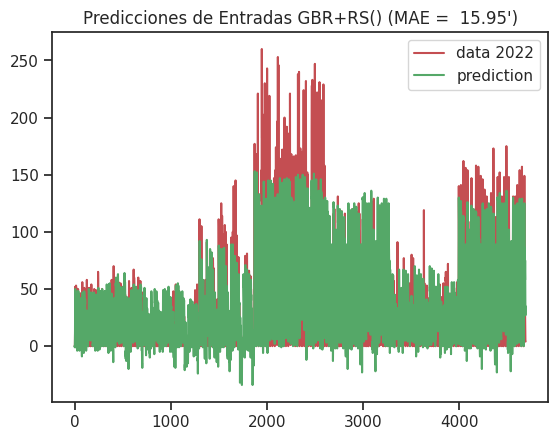

In [ ]:
xx = np.stack(i for i in range(df_test_entries.shape[0]))
plt.plot(xx, df_test_entries, c='r', label='data 2022')
plt.plot(xx, y_pred_in, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Predicciones de Entradas GBR+RS() (MAE = %6.2f')" % (mae_entries))
plt.show()

Text(0.5, 1.0, 'Predicciones de Entradas GBR+RS() ( MAE =  15.95)')

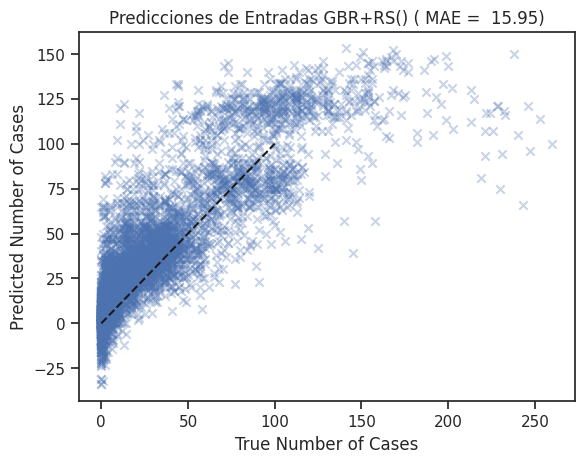

In [ ]:
plt.scatter(df_test_entries.to_numpy(int), y_pred_in, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("Predicciones de Entradas GBR+RS() ( MAE = %6.2f)" % (mae_entries))

***Generación de la Matriz: Predicciones de Salidas***

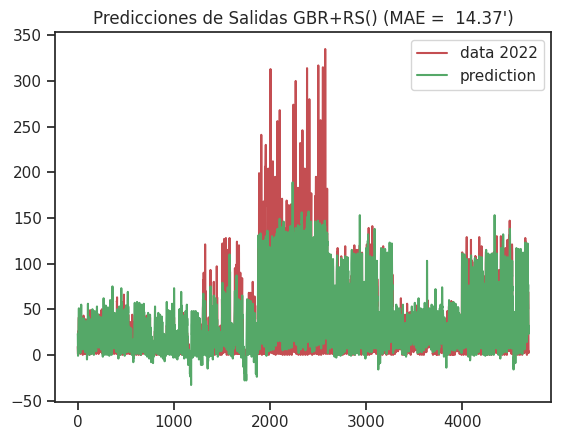

In [ ]:
xx = np.stack(i for i in range(df_test_departures.shape[0]))
plt.plot(xx, df_test_departures, c='r', label='data 2022')
plt.plot(xx, y_pred_out, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Predicciones de Salidas GBR+RS() (MAE = %6.2f')" % (mae_departures))
plt.show()

Text(0.5, 1.0, 'Predicciones de Salidas GBR+RS() ( MAE =  14.37)')

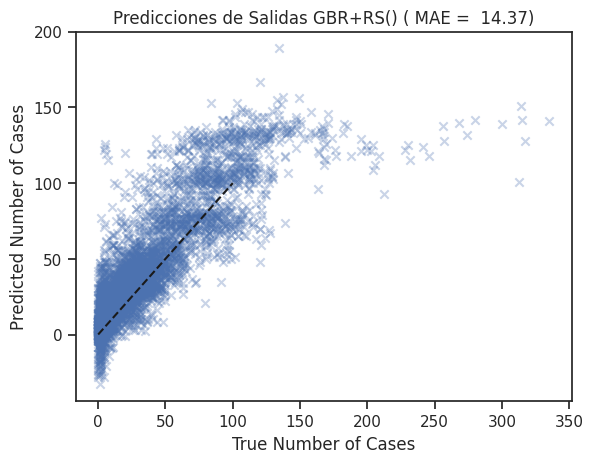

In [ ]:
plt.scatter(df_test_departures.to_numpy(int), y_pred_out, alpha=0.3, marker='x')
plt.plot([0, 100], [0, 100], "--k")
plt.axis("tight")
plt.xlabel("True Number of Cases")
plt.ylabel("Predicted Number of Cases")
plt.title("Predicciones de Salidas GBR+RS() ( MAE = %6.2f)" % (mae_departures))

# ***Exportar los Resultados***

In [ ]:
from google.colab import files
df_test['Predicted Entries'] = y_pred_in
df_test['Predicted Departures'] = y_pred_out

df_test['Parking'].replace([0,1,2,3,4,5,6], ['ELDER','MATA','METROPOL','RINCÓN','SANAPÚ','VEGUETA','SAN BERNARDO'],inplace=True)
df_test['DayWeek'].replace([0,1,2,3,4,5,6], ['L','M','X','J','V','S','D'],inplace=True)

df_test[['Parking','DayWeek','Day','Timeslot','CheckIn','Predicted Entries']].to_csv("Predicciones_Entradas.csv", index=False)
df_test[['Parking','DayWeek','Day','Timeslot','CheckOut','Predicted Departures']].to_csv("Predicciones_Salidas.csv", index=False)

files.download('Predicciones_Entradas.csv')
files.download('Predicciones_Salidas.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***Observaciones y Resultados***

***Predicciones_Entradas.csv***

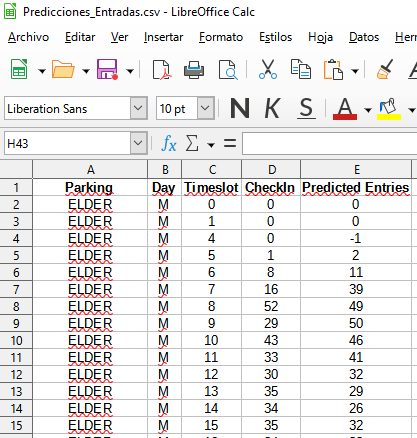

***Predicciones_Salidas.csv***

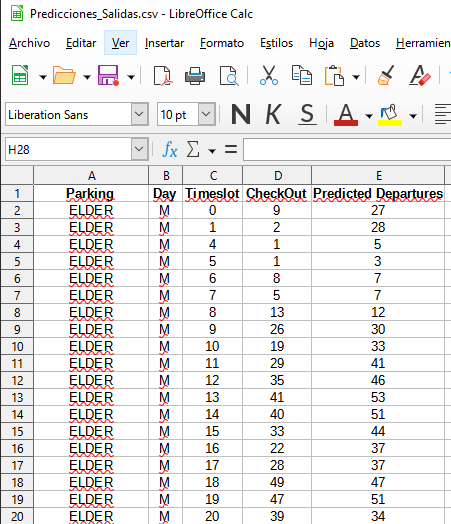

# ***API Rest del Modelo (Local)***

***Para generar la API REST del modelo de predicciones, hemos utilizado los siguientes recursos:***

- https://www.youtube.com/watch?v=vibDbEBnyV4 (Guía para levantar un servidor API REST con StreamLit y Google Cloud)

- https://github.com/DavidReveloLuna/API_Gcloud_Streamlit (Enlace al proyecto de la guía anterior)

## ***Estructura de la API***

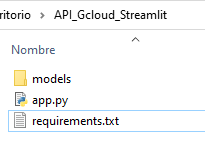

***Modelos de la API (Importados Anteriormente)***

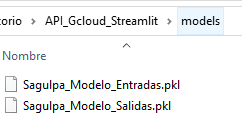

***Requerimientos del servicio***

gunicorn==19.9.0

Flask==1.1.1

numpy==1.20.3

pandas==1.3.5

scikit-learn==1.0.2

streamlit==0.82.0


## ***Archivo app.py***

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template, url_for
import pickle
from sklearn import svm
import streamlit as st
import joblib

# Path de los modelos preentrenados
MODEL_PATH_ENTRIES = 'models/Sagulpa_Modelo_Entradas.pkl'
MODEL_PATH_DEPARTURES = 'models/Sagulpa_Modelo_Salidas.pkl'

entries_model = joblib.load(MODEL_PATH_ENTRIES)
departures_model = joblib.load(MODEL_PATH_DEPARTURES)

def entries_predicitons(x):
    return int(entries_model.predict(x))

def departures_predicitons(x):
    return int(departures_model.predict(x))

# Diccionarios de acceso a los datos según sus valores de entrada
dicc_parking = {'ELDER':0,'MATA':1,'METROPOL':2,'RINCÓN':3,'SANAPÚ':4,'VEGUETA':5,'SAN BERNARDO':6}
dicc_dayweek = {'L':0,'M':1,'X':2,'J':3,'V':4,'S':5,'D':6}

def main():

    # Título
    html_temp = """
    <h1 style="color:#181082;text-align:center;">Predicción de Entradas/Salidas Parkings Sagulpa </h1>
    </div>
    """
    st.markdown(html_temp,unsafe_allow_html=True)

    # Lectura de datos
    Prediction = st.selectbox("Tipo de Predicción:", ['Entradas', 'Salidas'])
    Parking = st.selectbox("Parking:", ['ELDER','MATA','METROPOL','RINCÓN','SANAPÚ','VEGUETA','SAN BERNARDO'])
    Date = st.date_input("Fecha:")
    day_value = Date.day
    month_value = Date.month
    year_value = Date.year
    Dayweek = st.selectbox("Día de la Semana:", ['L','M','X','J','V','S','D'])
    Timeslot = st.text_input("Hora (0 a 23):")
    Holiday = st.checkbox("¿Es día no-lectivo?")
    Schoolday = st.checkbox("¿Es día escolar?")
    Temperature = st.text_input("Temperatura:")
    Humidity = st.text_input("Humedad:")
    
    # El botón predicción se usa para iniciar el procesamiento
    if st.button("Predicción"): 
        # ESCOGER EL VALOR DEL PARKING SELECCIONADO
        for clave in dicc_parking:
            if Parking == clave:
                parking_value = dicc_parking[clave]

        # ESCOGER EL VALOR DEL DÍA DE LA SEMANA SELECCIONADO
        for clave in dicc_dayweek:
            if Dayweek == clave:
                dayweek_value = dicc_dayweek[clave]

        # ESTOS SERÁN LOS DATOS QUE SE LE PASARÁN AL MODELO
        x = np.array([np.int_(parking_value),
                np.int_(day_value),
                np.int_(month_value),
                np.int_(year_value),
                np.int_(dayweek_value),
                np.int_(Timeslot.title()),
                np.int_(Holiday),
                np.int_(Schoolday),
                np.float_(Temperature.title()),
                np.float_(Humidity.title())
                ])
        x = x.reshape(1,-1)
        
        # ESCOGER EL VALOR DEL TIPO DE PREDICCIÓN
        if Prediction == 'Entradas':
            st.success(f'El número de Entradas predicho es: {entries_predicitons(x)}')
        elif Prediction == 'Salidas':
            st.success(f'El número de Salidas predicho es: {departures_predicitons(x)}')

if __name__ == '__main__':
    main()

## ***Levantamiento del Servicio y Prueba de Predicción***

***Aranque del Servicio***

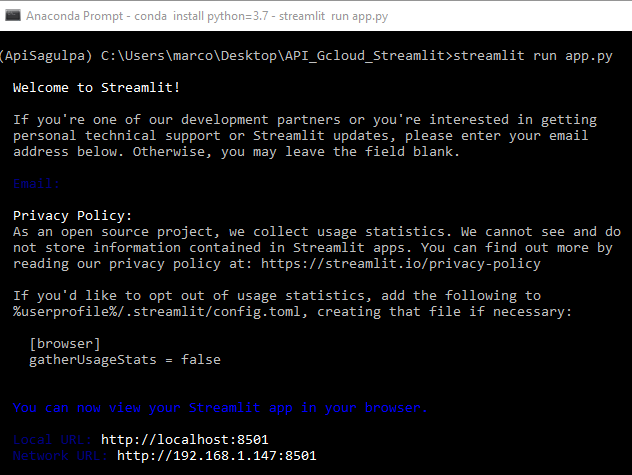

***Prueba de Predicción***

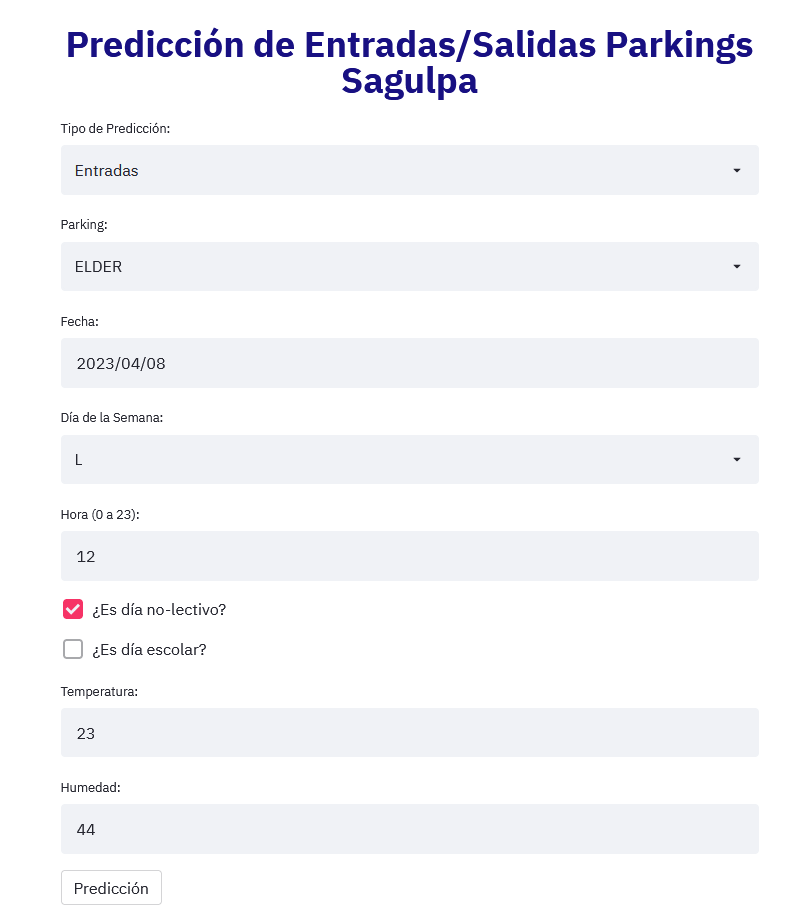